In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv('walmart_data.csv')
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
391470,1000235,P00331842,M,26-35,0,B,0,0,16,16244
510655,1000698,P00173842,M,18-25,4,A,1,0,1,3894
332623,1003292,P00114342,F,51-55,6,B,3,0,1,15305
524069,1002776,P00260042,M,26-35,14,C,4+,0,5,8772
126828,1001557,P00178842,F,18-25,4,C,1,0,2,15882
446701,1002826,P00246342,M,36-45,12,A,4+,1,11,6031
75310,1005607,P00201542,M,18-25,4,C,2,0,5,5278
378905,1004287,P00050442,M,26-35,7,C,2,1,1,15345
505955,1005948,P00315442,M,55+,13,B,0,0,1,15837
478726,1001714,P00227842,M,26-35,17,C,0,1,2,10104


In [73]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [75]:
df.shape

(550068, 10)

In [76]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [77]:
def age_to_category(age):
    if age == '0-17':
        return 'Children'        
    elif age== '18-25':
        return 'Youngster'        
    elif age== '26-35':
        return 'Adult'        
    elif age== '36-45':
        return 'Middle-aged'        
    elif age== '46-50':
        return 'Senior-Citizen'        
    elif age== '51-55':
        return 'Elderly'        
    elif age== '55+':
        return 'Old'        

In [78]:
df["Age_Group"] = df['Age'].apply(age_to_category)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Group
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Children
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Children
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Children
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Children
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Old


<Axes: ylabel='Occupation'>

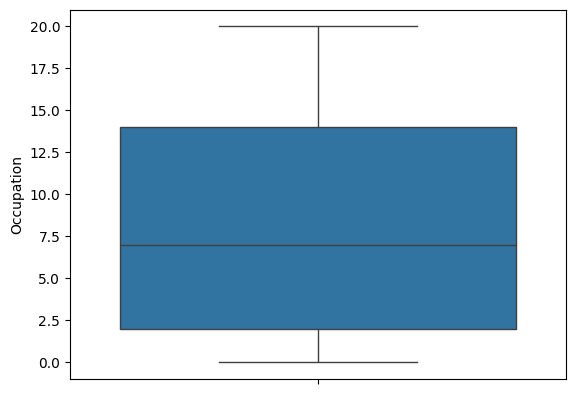

In [79]:
sns.boxplot(data= df, y = 'Occupation')

<Axes: ylabel='Purchase'>

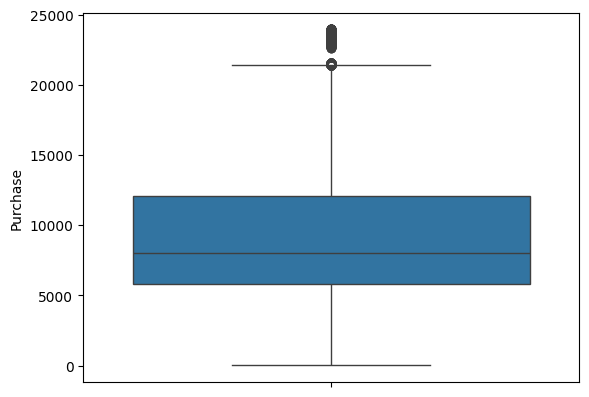

In [80]:
sns.boxplot(data= df, y = 'Purchase')

In [81]:
def data_clipping(dataframe, column):    
    percentile_5 = np.quantile(dataframe[column], 0.05)
    percentile_95 = np.quantile(dataframe[column], 0.95)
    clipped_data = np.clip(dataframe[column], percentile_5, percentile_95)
    return clipped_data

In [82]:
df['Purchase'] = data_clipping(df, 'Purchase')

<Axes: ylabel='Purchase'>

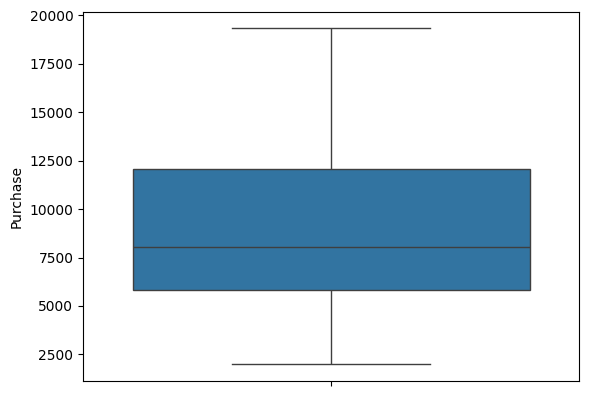

In [83]:
sns.boxplot(data= df, y = 'Purchase')

<Axes: xlabel='Purchase', ylabel='Count'>

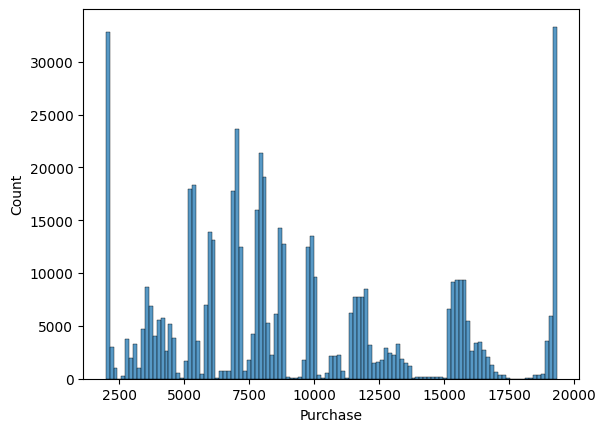

In [84]:
sns.histplot(data= df, x = 'Purchase')

<Axes: xlabel='Age_Group', ylabel='count'>

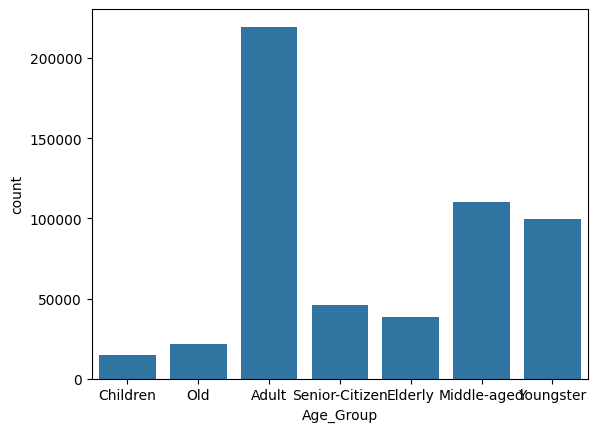

In [85]:
sns.countplot(data= df, x = 'Age_Group')

In [86]:
df.shape


(550068, 11)

# Data Exploration

<Axes: xlabel='Age_Group', ylabel='Purchase'>

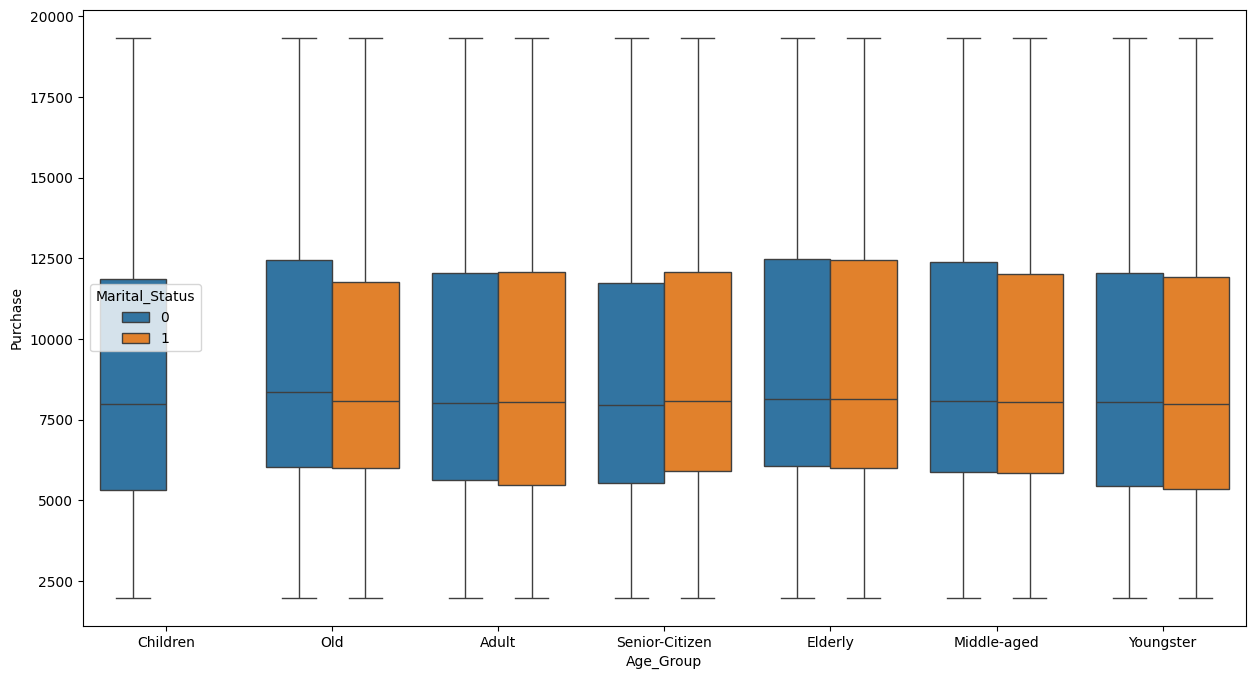

In [87]:
plt.figure(figsize=(15,8))
sns.boxplot( data=df,x='Age_Group', y ='Purchase', hue='Marital_Status')

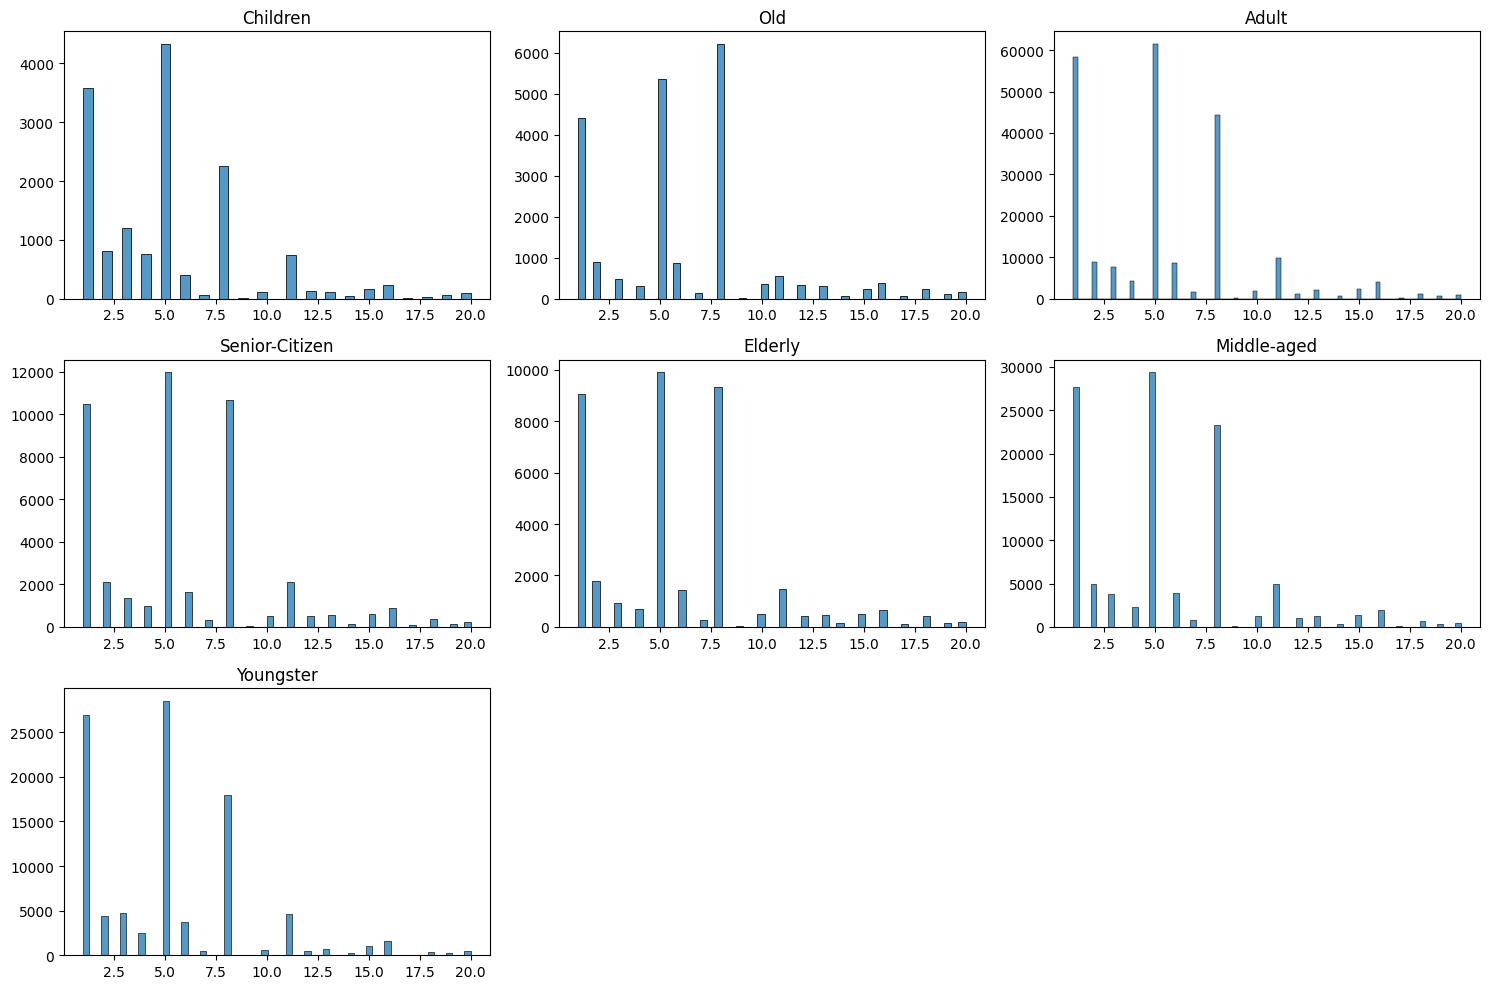

In [88]:
plt.figure(figsize=(15,10))
plot_count = 1
for age_group in df['Age_Group'].unique():
    plt.subplot(3,3,plot_count)
    sns.histplot(df[df['Age_Group'] == age_group]['Product_Category'], label=age_group)
    plt.title(age_group)
    plot_count += 1
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

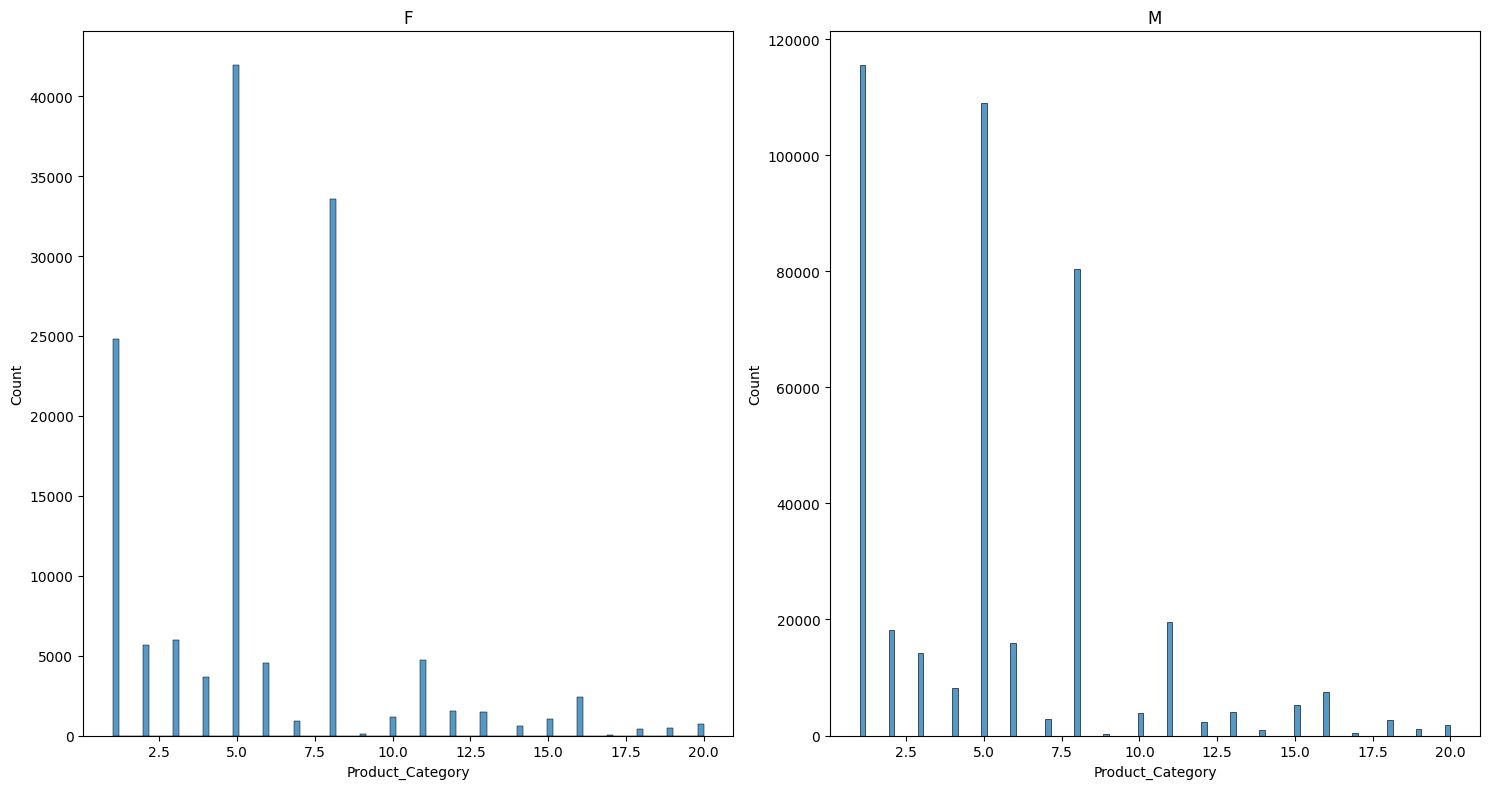

In [89]:
plt.figure(figsize=(15,8))
plot_count = 1
for gender in df['Gender'].unique():
    plt.subplot(1,2,plot_count)
    sns.histplot(df[df['Gender'] == gender]['Product_Category'], label=gender)
    plt.title(gender)
    plot_count += 1
    # plt.xlabel('')
    # plt.ylabel('')
    plt.tight_layout()

# CLT

In [115]:
def central_limit_theorem(dataframe, column, title):
    plt.figure(figsize=(12, 12))    

    plot_no = 1

    for n in [300, 3000, 30000]:
        new_sample = np.random.choice(dataframe[column], size=(10000, n))        
        sample_means = np.mean(new_sample, axis=1)        
        sample_mean = round(sample_means.mean(),2)
        sample_std = round(sample_means.std(),2)
        margin_error = round(norm.ppf(0.025) * sample_std, 2)
        print(f"Confidence Interval of 95% for {n} Sample Size: {[round(sample_mean + margin_error,2), round(sample_mean - margin_error,2)]} using z-score: ")
        print(f"Confidence Interval of 95% for {n} Sample Size: {np.percentile(sample_means,[2.5, 97.5])}")
        plt.subplot(2,2,plot_no)
        plt.xlabel(f"n= {n}; mean={sample_mean:.1f}; se={sample_std:.2f};")
        plt.suptitle(title)
        sns.histplot(x=sample_means, stat='probability')
        
        plot_no += 1

# CLT for entire Dataset

Confidence Interval of 95% for 300 Sample Size: [8700.6, 9813.42] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8713.079      9817.80758333]
Confidence Interval of 95% for 3000 Sample Size: [9084.16, 9428.64] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [9084.38189167 9428.45425   ]
Confidence Interval of 95% for 30000 Sample Size: [9201.01, 9312.45] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [9199.49636833 9312.281995  ]


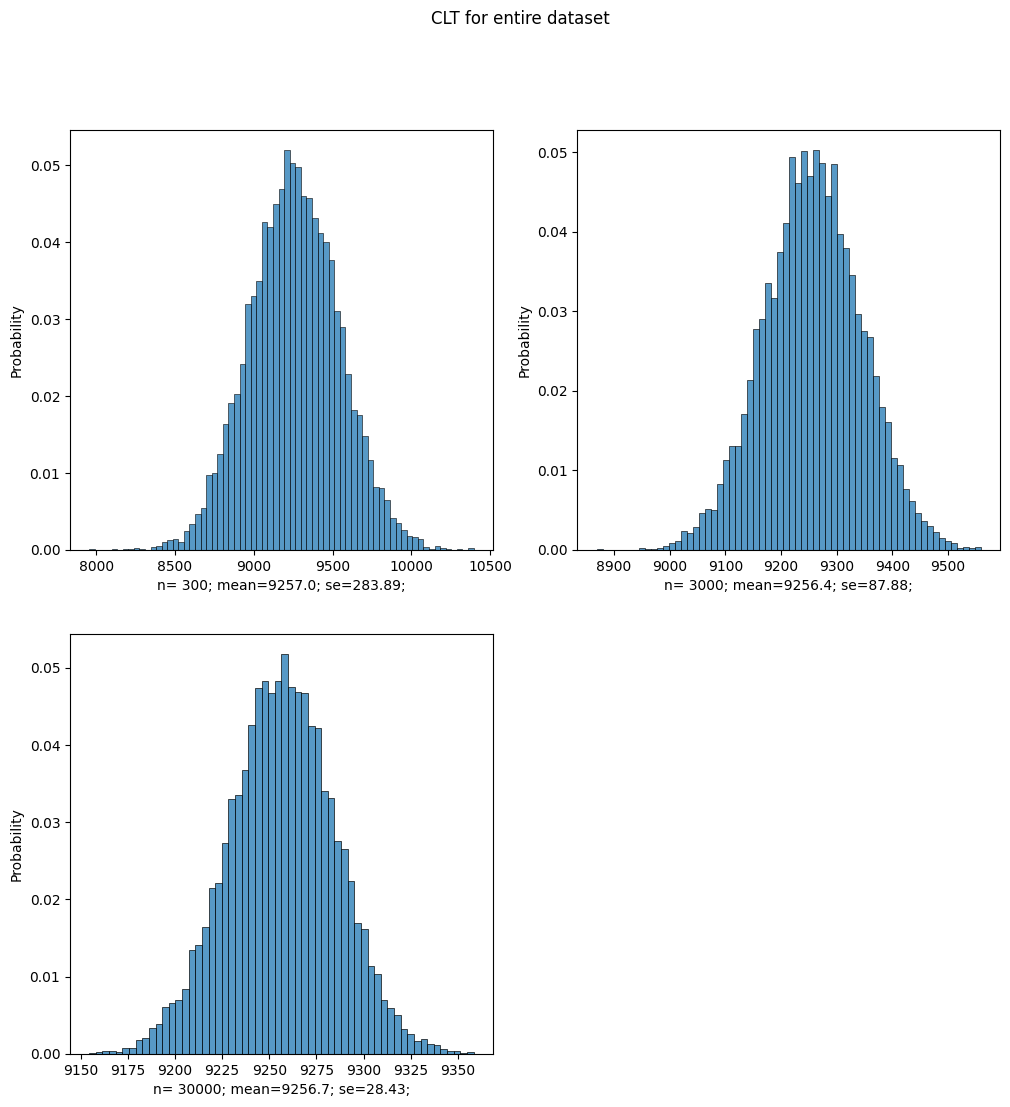

In [116]:
central_limit_theorem(df, 'Purchase', "CLT for entire dataset")

# How does gender affect the amount spent?

In [8]:
np.percentile(df[df['Gender'] =='M']['Purchase'],[2.5, 97.5])

array([ 1436., 19925.])

In [9]:
np.percentile(df[df['Gender'] =='F']['Purchase'],[2.5, 97.5])

array([ 1376., 19648.])

Confidence Interval of 95% for 300 Sample Size: [8863.24, 9996.02] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8864.90425 9994.204  ]
Confidence Interval of 95% for 3000 Sample Size: [9249.16, 9603.76] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [9250.39498333 9604.80538333]
Confidence Interval of 95% for 30000 Sample Size: [9371.56, 9483.0] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [9372.12138917 9483.16056083]


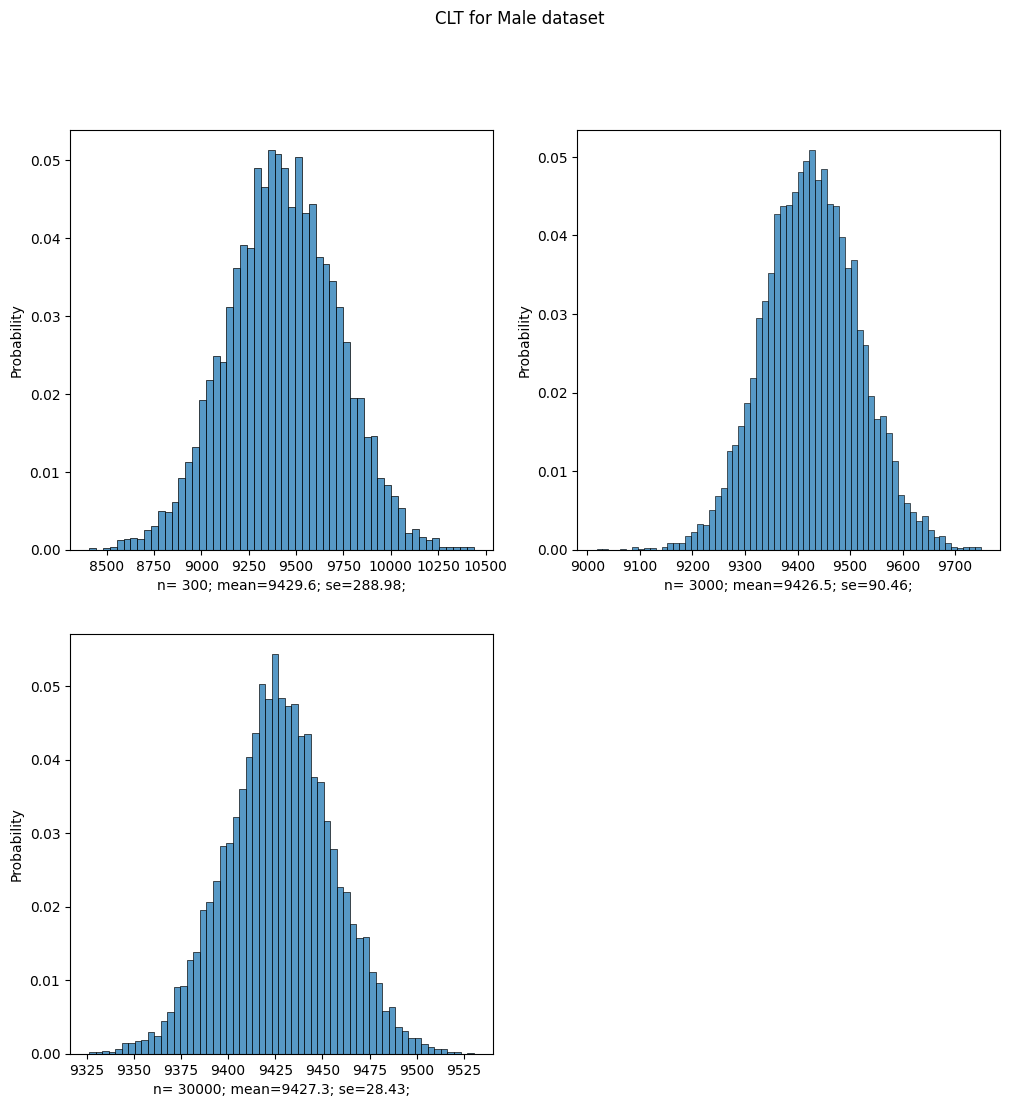

In [117]:
central_limit_theorem(df[df['Gender'] =='M'], 'Purchase', "CLT for Male dataset")

Confidence Interval of 95% for 300 Sample Size: [8214.96, 9263.58] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8225.56458333 9274.00066667]
Confidence Interval of 95% for 3000 Sample Size: [8569.59, 8902.55] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [8569.23101667 8901.59145   ]
Confidence Interval of 95% for 30000 Sample Size: [8685.06, 8788.28] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [8684.61648   8787.8283725]


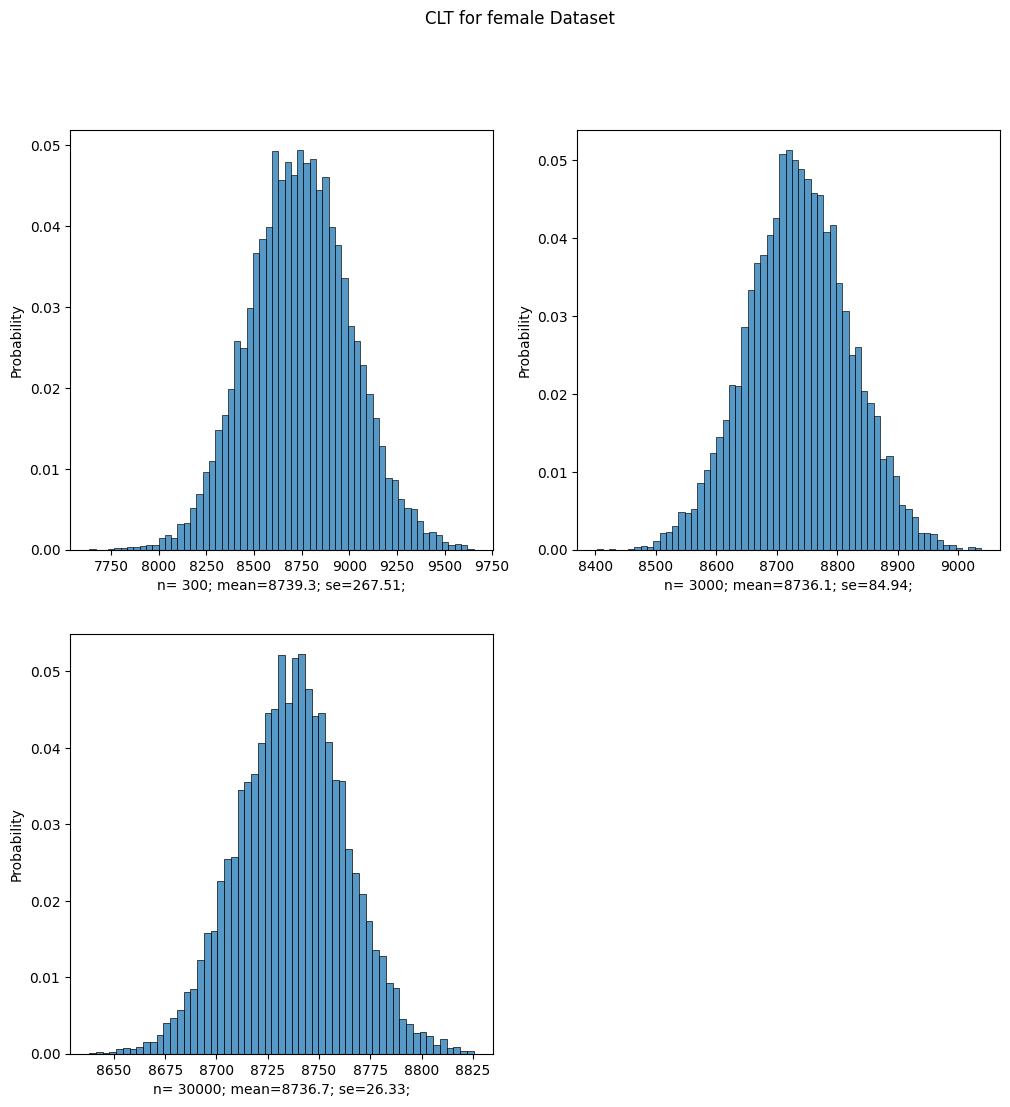

In [118]:
central_limit_theorem(df[df['Gender'] =='F'], 'Purchase', "CLT for female Dataset")

# How does Marital_Status affect the amount spent?

Confidence Interval of 95% for 300 Sample Size: [8715.72, 9804.44] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8715.98983333 9812.87833333]
Confidence Interval of 95% for 3000 Sample Size: [9080.85, 9432.71] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [9077.84135    9432.22509167]
Confidence Interval of 95% for 30000 Sample Size: [9204.21, 9314.05] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [9203.75076833 9314.659305  ]


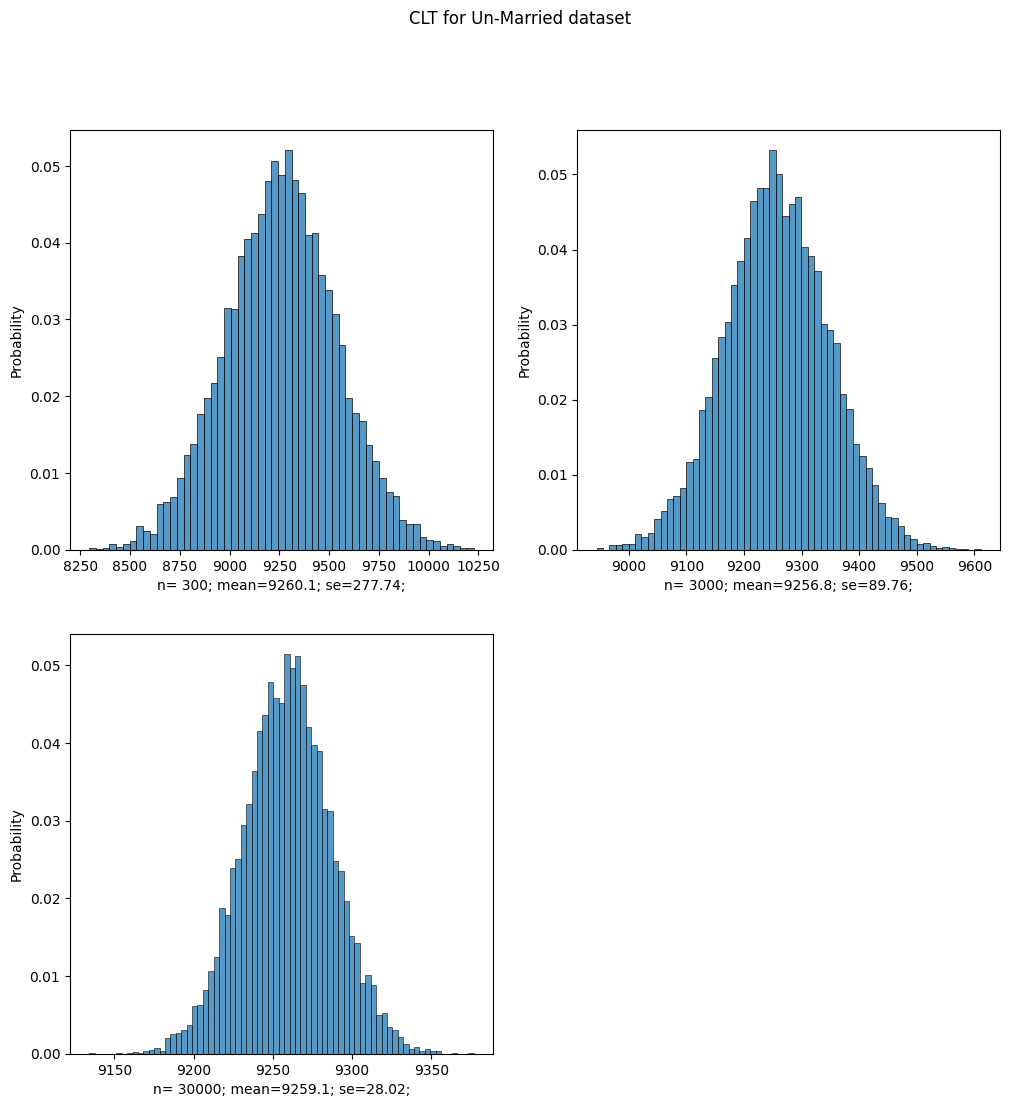

In [119]:
central_limit_theorem(df[df['Marital_Status'] == 0], 'Purchase', "CLT for Un-Married dataset")

Confidence Interval of 95% for 300 Sample Size: [8704.96, 9794.86] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8715.31991667 9800.70075   ]
Confidence Interval of 95% for 3000 Sample Size: [9080.66, 9425.26] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [9080.669275   9427.88975833]
Confidence Interval of 95% for 30000 Sample Size: [9198.1, 9308.68] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [9198.64651917 9309.51739083]


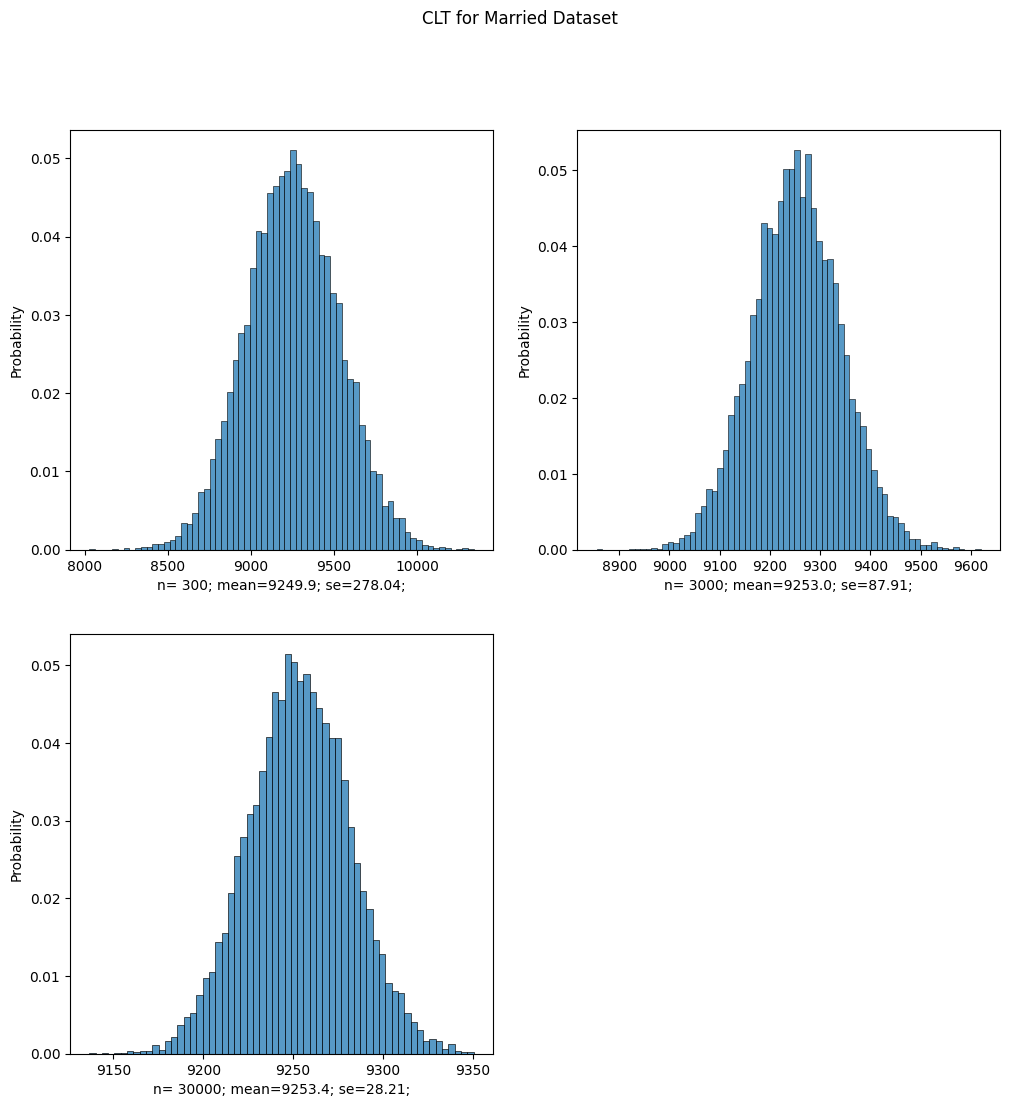

In [120]:
central_limit_theorem(df[df['Marital_Status'] == 1], 'Purchase', "CLT for Married Dataset")

# How does Age affect the amount spent?

CLT for Age Group: Children
Confidence Interval of 95% for 300 Sample Size: [8376.8, 9499.2] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8390.34908333 9510.79725   ]
Confidence Interval of 95% for 3000 Sample Size: [8763.23, 9115.87] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [8764.73165833 9115.06423333]
Confidence Interval of 95% for 30000 Sample Size: [8884.02, 8996.4] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [8883.50749833 8996.1906225 ]
CLT for Age Group: Old
Confidence Interval of 95% for 300 Sample Size: [8781.51, 9882.07] using z-score: 
Confidence Interval of 95% for 300 Sample Size: [8787.28491667 9888.8775    ]
Confidence Interval of 95% for 3000 Sample Size: [9156.5, 9499.66] using z-score: 
Confidence Interval of 95% for 3000 Sample Size: [9155.77525833 9496.45325   ]
Confidence Interval of 95% for 30000 Sample Size: [9273.45, 9381.99] using z-score: 
Confidence Interval of 95% for 30000 Sample Size: [9272

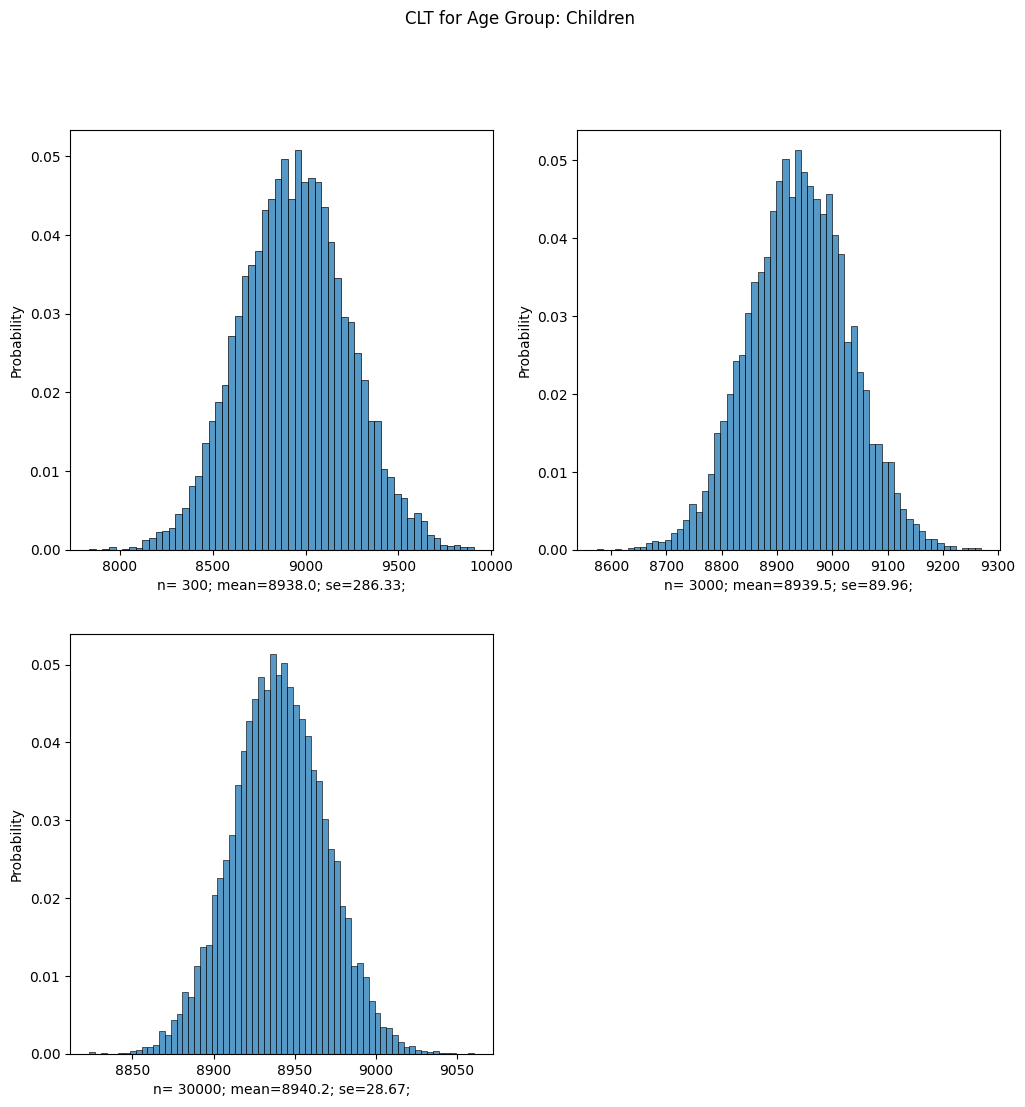

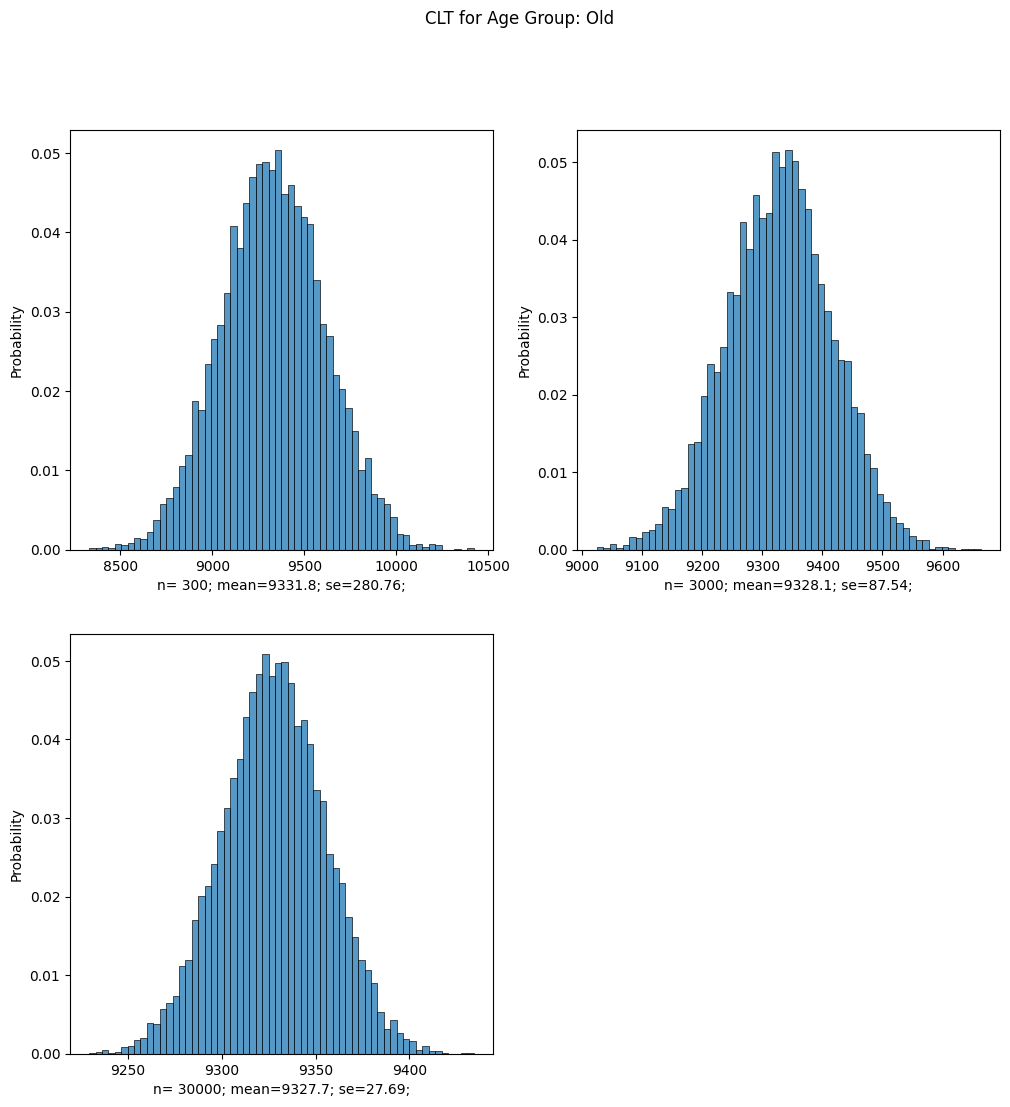

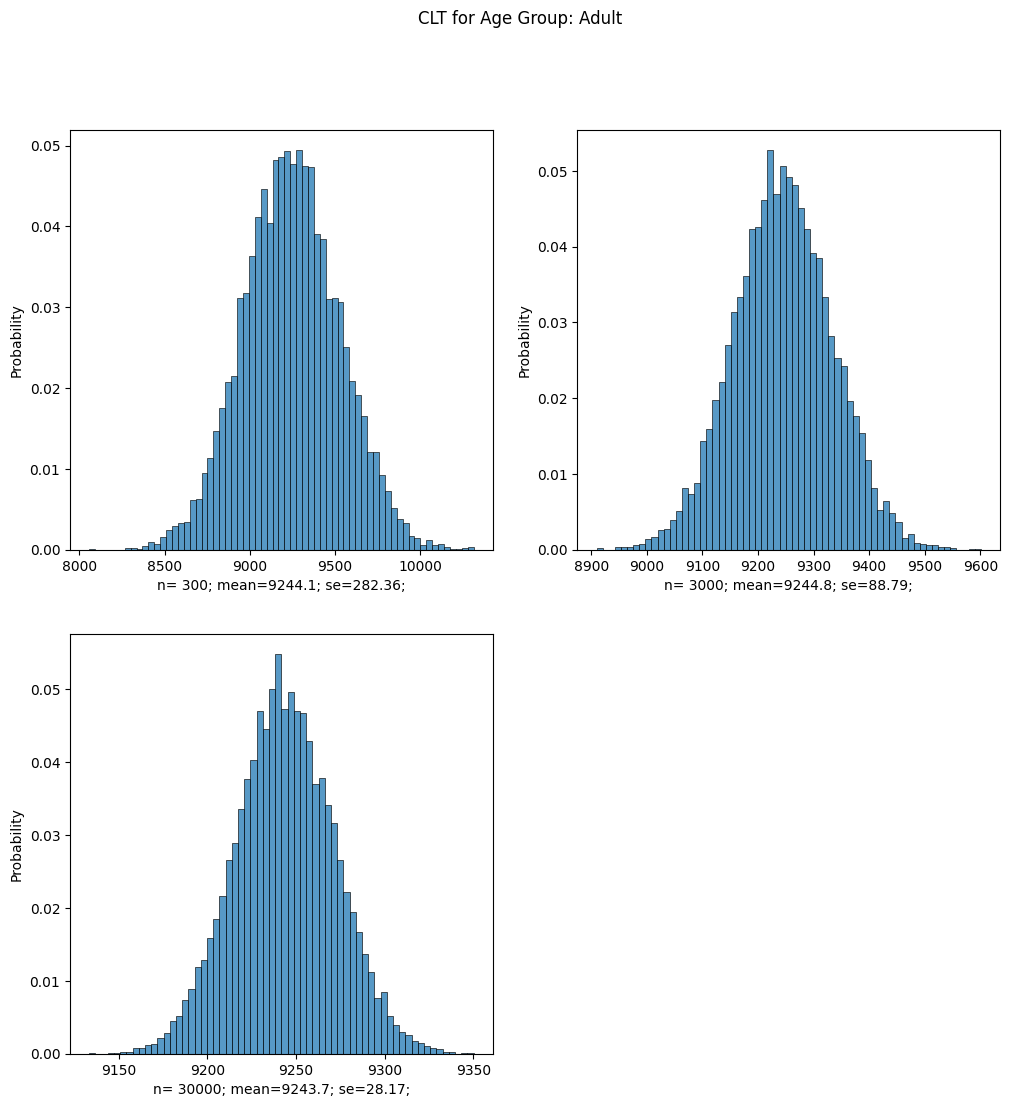

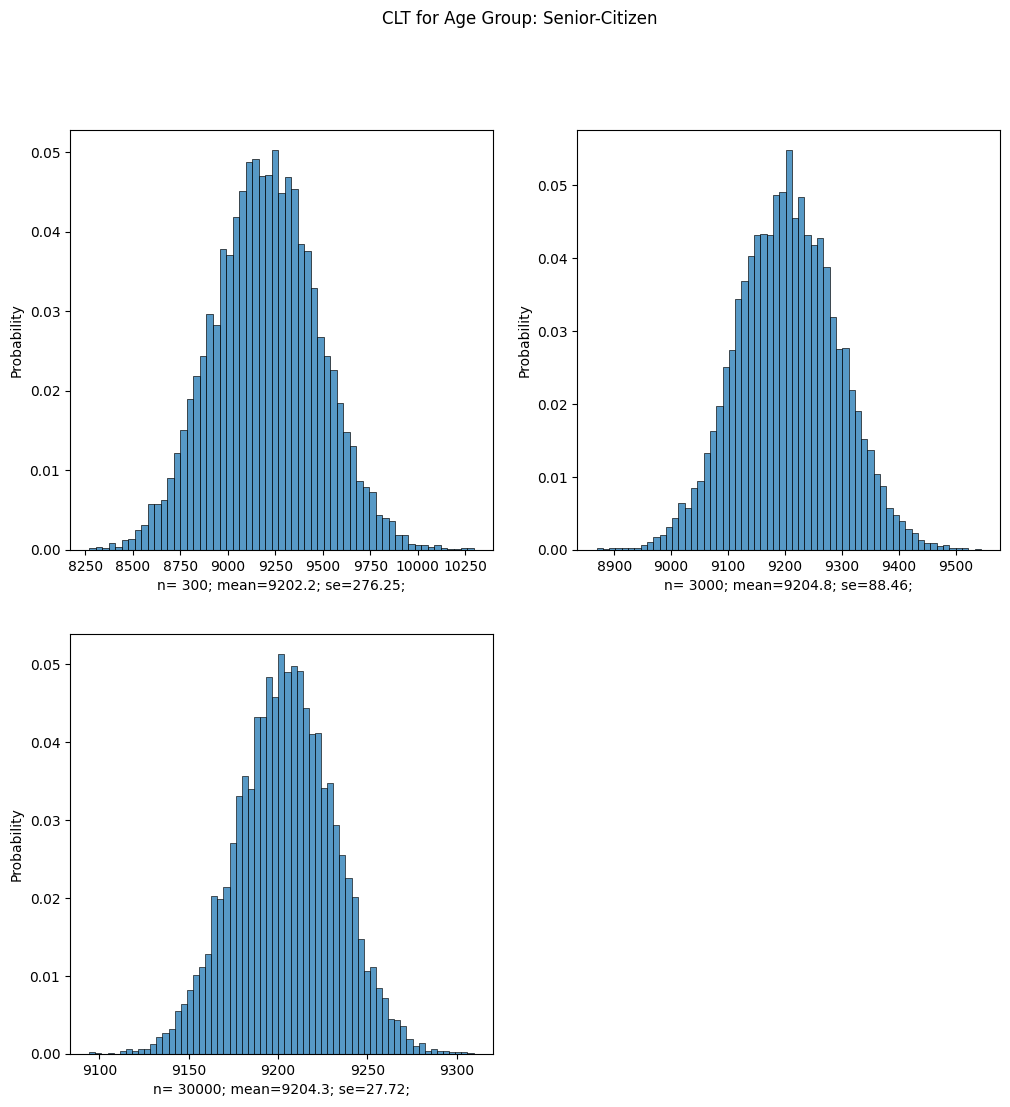

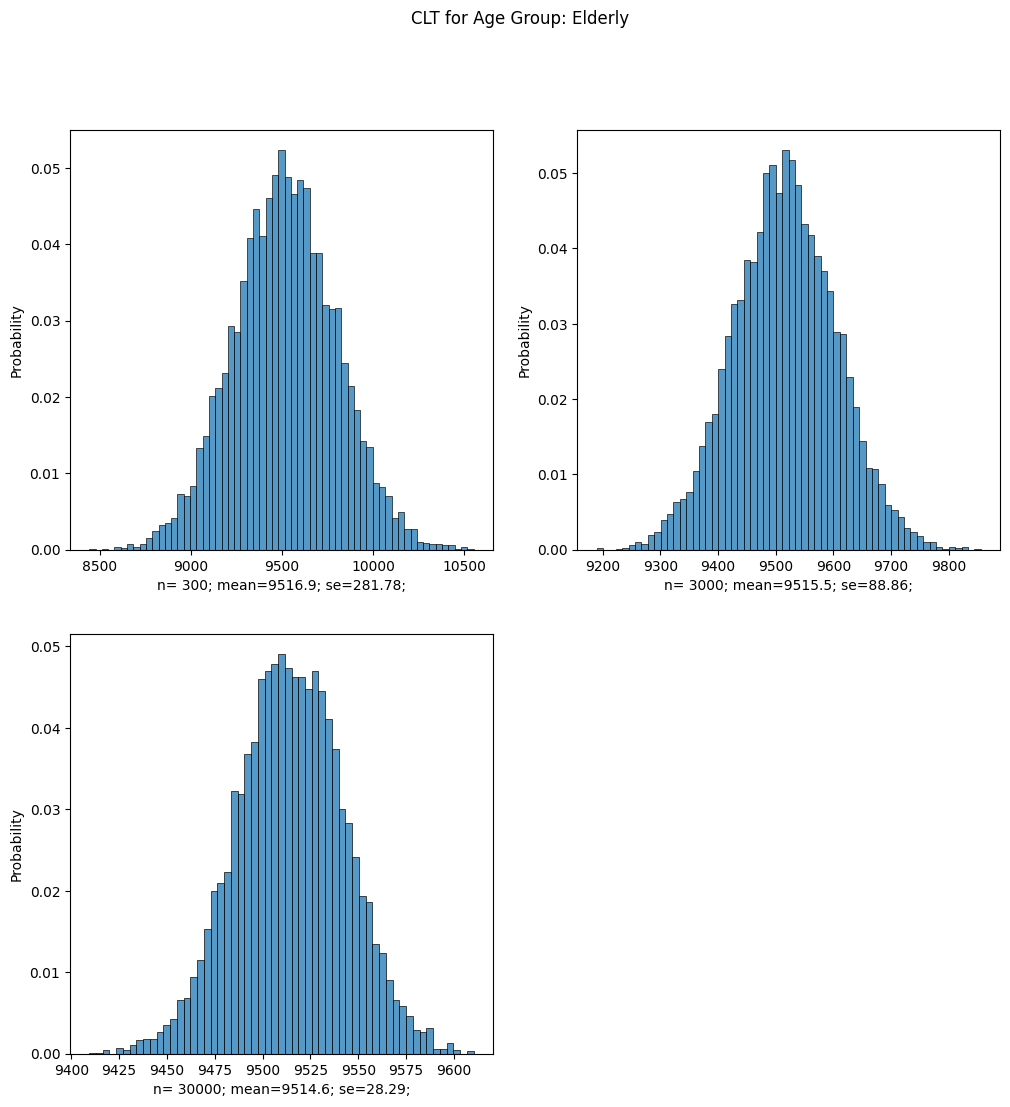

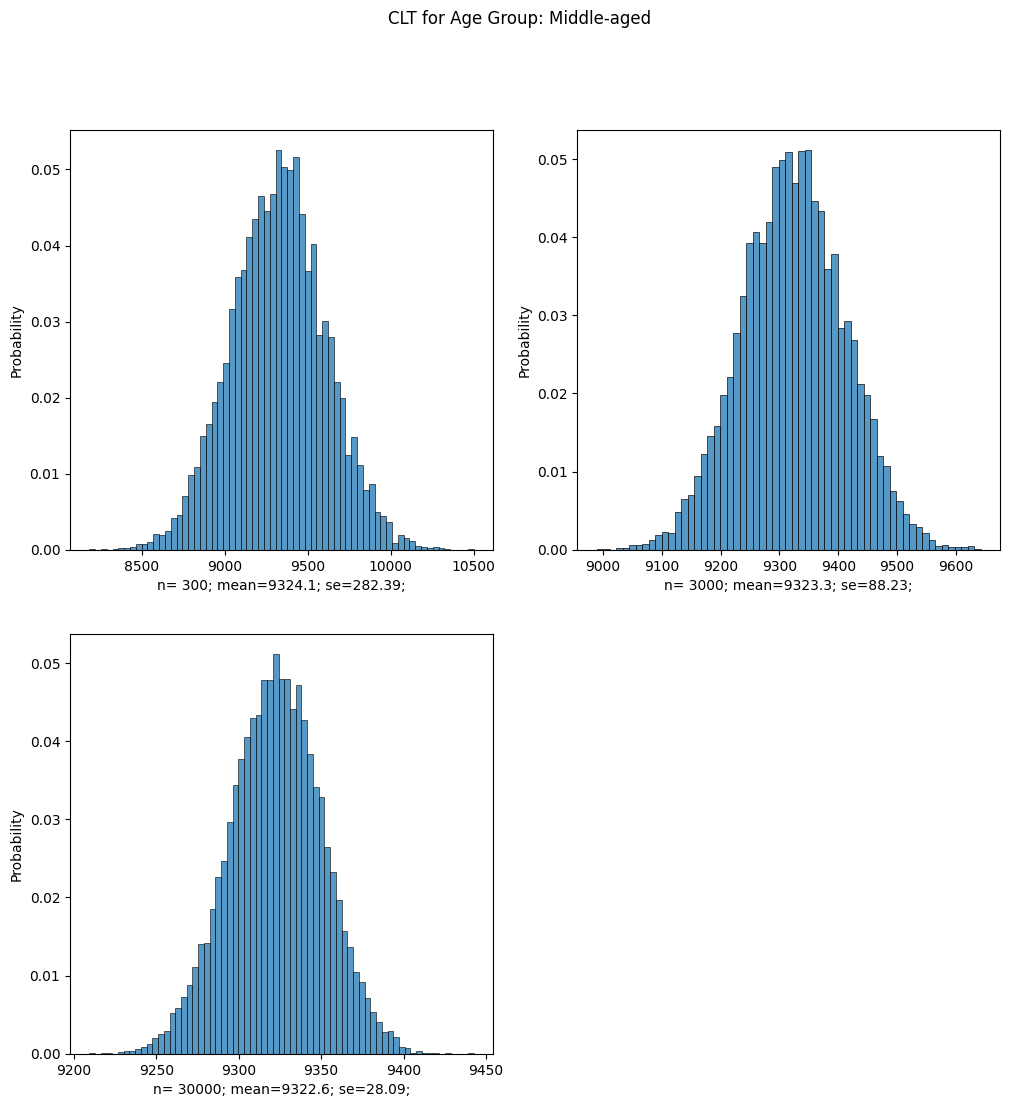

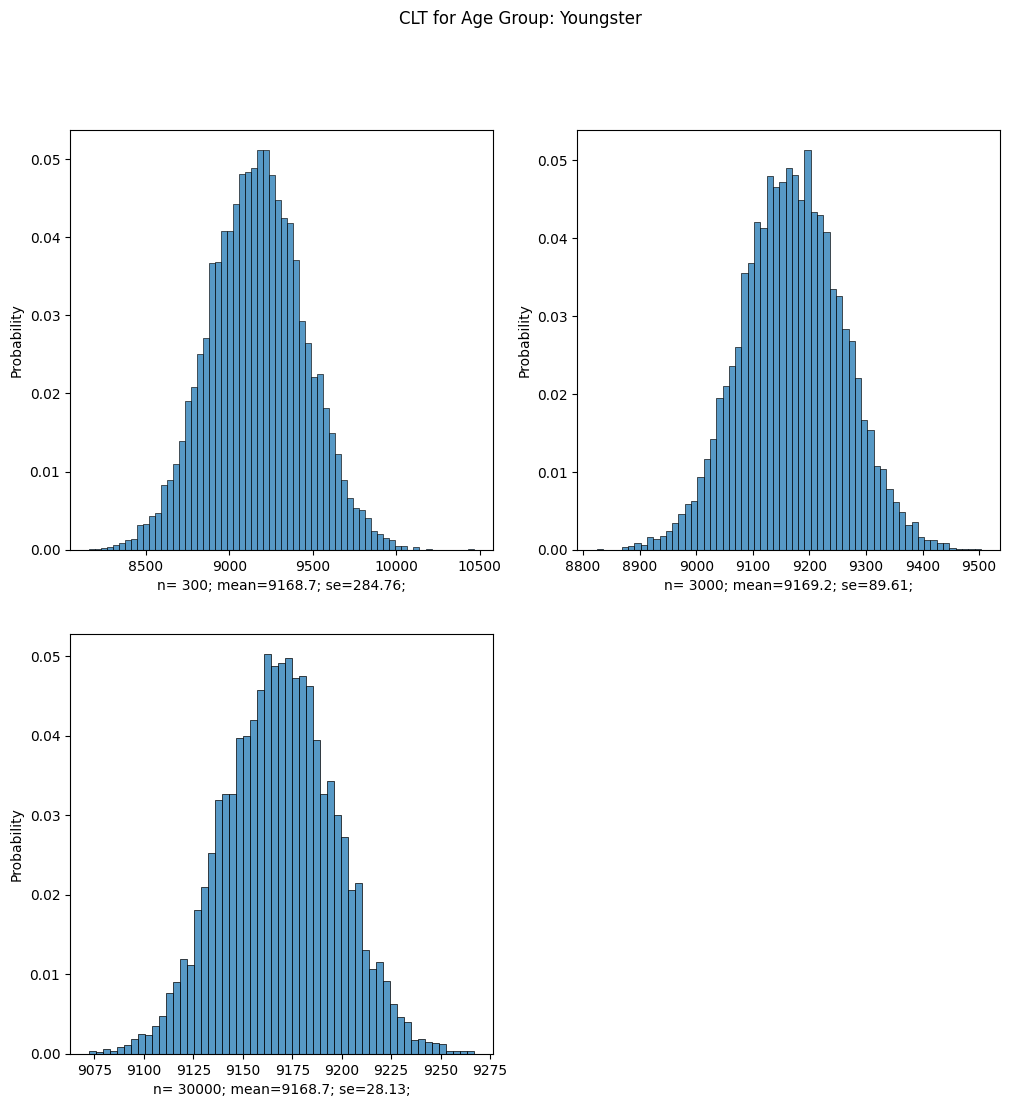

In [121]:
for age_group in df['Age_Group'].unique():
    print(f"CLT for Age Group: {age_group}")
    central_limit_theorem(df[df['Age_Group'] == age_group], 'Purchase', f"CLT for Age Group: {age_group}")